# Aula 2 - Estat√≠stica parte 1: frequ√™ncias e medidas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## 1 Conhecendo os dados

### 1.1 _Dataset_ utilizado

Vamos utilizar um _dataset_ criado a partir dos microdados do PNAD de 2015 em nossos estudos de est√°tistica descritiva. Abaixo temos a defini√ß√£o do PNAD retirada do pr√≥prio site:

> ### Pesquisa Nacional por Amostra de Domic√≠lios - 2015
>
> A **Pesquisa Nacional por Amostra de Domic√≠lios - PNAD** investiga anualmente, de forma permanente, caracter√≠sticas gerais da popula√ß√£o, de educa√ß√£o, trabalho, rendimento e habita√ß√£o e outras, com periodicidade vari√°vel, de acordo com as necessidades de informa√ß√£o para o pa√≠s, como as caracter√≠sticas sobre migra√ß√£o, fecundidade, nupcialidade, sa√∫de, seguran√ßa alimentar, entre outros temas. O levantamento dessas estat√≠sticas constitui, ao longo dos 49 anos de realiza√ß√£o da pesquisa, um importante instrumento para formula√ß√£o, valida√ß√£o e avalia√ß√£o de pol√≠ticas orientadas para o desenvolvimento socioecon√¥mico e a melhoria das condi√ß√µes de vida no Brasil.

Os seguintes tratamentos foram realizados nos dados originais:

1. Foram eliminados os registros onde a **Renda** era inv√°lida (`999 999 999 999`)
2. Foram eliminados os registros onde a **Renda** era missing
3. Foram considerados somente os registros das **Pessoas de Refer√™ncia** de cada domic√≠lio (respons√°vel pelo domic√≠lio)

As vari√°veis utilizadas s√£o:

- `renda`: Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade
- `idade`: Idade do morador na data de refer√™ncia em anos
- `altura`: Altura do morador em metros
- `uf`: 

|C√≥digo|Descri√ß√£o|
|---|---|
|11|Rond√¥nia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Par√°|
|16|Amap√°|
|17|Tocantins|
|21|Maranh√£o|
|22|Piau√≠|
|23|Cear√°|
|24|Rio Grande do Norte|
|25|Para√≠ba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Esp√≠rito Santo|
|33|Rio de Janeiro|
|35|S√£o Paulo|
|41|Paran√°|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goi√°s|
|53|Distrito Federal|

- `sexo`: 

|C√≥digo|Descri√ß√£o|
|---|---|
|0|Masculino|
|1|Feminino|

- `anos de estudo`: 

|C√≥digo|Descri√ß√£o|
|---|---|
|1|Sem instru√ß√£o e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|N√£o determinados| 
||N√£o aplic√°vel|

- `cor`: 

|C√≥digo|Descri√ß√£o|
|---|---|
|0|Ind√≠gena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declara√ß√£o|

In [2]:
df = pd.read_csv("dados/aula2_pnad_2015.csv")
df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df

uf  sexo  idade  cor  anos_de_estudo  renda    altura
0      11     0     23    8              12    800  1.603808
1      11     1     23    2              12   1150  1.739790
2      11     1     35    8              15    880  1.760444
3      11     0     46    2               6   3500  1.783158
4      11     1     47    8               9    150  1.690631
...    ..   ...    ...  ...             ...    ...       ...
76835  53     1     46    2              11    812  1.687030
76836  53     0     30    4               7   1500  1.792934
76837  53     0     32    8              12   1300  1.830587
76838  53     0     57    8               4   1500  1.726344
76839  53     0     38    8               4    900  1.658305

[76840 rows x 7 columns]

### 1.2 Tipos de dados

Em estat√≠stica separamos os dados em dois tipos:

- **qualitativos**: aqueles que representam uma qualidade ou um atributo dos dados
  - **ordinais**: que podem ser ordenados ou hierarquizados
  - **nominais**: que N√ÉO podem ser ordenados ou hierarquizados
- **quantitativos**: que representam uma quantidade, uma mensura√ß√£o dos dados
  - **discretos**: contagem onde os valores poss√≠veis formam um conjunto finito
  - **cont√≠nuos**: possui infinitos valores poss√≠veis dentro de um intervalo

Olhando para nosso conjunto de dados, podemos classific√°-las seguindo essa defini√ß√£o de tipos:

|Vari√°vel|Tipo|Subtipo|
|---|---|---|
|uf|qualitativa|nominal|
|sexo|qualitativa|nominal|
|idade|quantitativo|discreto|
|cor|qualitativa|nominal|
|anos_de_estudo|qualitativa|ordinal|
|renda|quantitativo|discreto|
|altura|quantitativo|cont√≠nuo|

In [3]:
# qualitativa ordinal: anos_de_estudo
sorted(df.anos_de_estudo.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [4]:
# qualitativas nominais: uf, sexo, cor
print(f"uf ({len(df.uf.unique())} valores poss√≠veis): {df.uf.unique()}")
print(f"sexo ({len(df.sexo.unique())} valores poss√≠veis): {df.sexo.unique()}")
print(f"cor ({len(df.cor.unique())} valores poss√≠veis): {df.cor.unique()}")

uf (27 valores poss√≠veis): [11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50
 51 52 53]
sexo (2 valores poss√≠veis): [0 1]
cor (5 valores poss√≠veis): [8 2 4 6 0]


In [5]:
# quantitativas discretas: idade, renda
print(f"idade ({len(df.idade.unique())} valores poss√≠veis): {df.idade.unique()}")
print(f"renda ({len(df.renda.unique())} valores poss√≠veis): {df.renda.unique()}")

idade (84 valores poss√≠veis): [23 35 46 47 34 57 60 50 26 49 52 38 45 43 53 62 69 41 25 33 44 65 32 30
 64 31 63 40 28 37 39 36 73 56 27 42 51 29 24 55 67 66 61 54 48 80 79 71
 59 19 22 77 58 17 72 70 18 21 20 68 74 76 75 84 85 78 15 82 95 13 83 81
 87 88 16 91 92 97 89 90 86 94 14 99]
renda (1606 valores poss√≠veis): [  800  1150   880 ... 36000  1329  5260]


Note que a `idade` pode ser classificada de diferentes formas. Aqui em nosso _dataset_ ela representa "anos completos", portanto √© do tipo **quantitativa discreta**. Se fosse a idade exata, incluindo fra√ß√µes de ano, seria do tipo **quantitativa cont√≠nua**. E poderia ser tamb√©m **qualitativa ordinal** se estivessemos trabalhando com faixas de idade.

E de certa forma o mesmo pode ser entendido para a vari√°vel `renda`, poder√≠amos estar considerando os centavos ou separando-a em faixas.

In [6]:
# quantitativas cont√≠nua: altura
print(f"altura: valores poss√≠veis v√£o de {df.altura.min()} at√© {df.altura.max()}")

altura: valores poss√≠veis v√£o de 1.339244614 at√© 2.028496765


## 2 Distribui√ß√£o de frequ√™ncias

### 2.1 Distribui√ß√£o de frequ√™ncias para vari√°veis qualitativas

#### 2.1.1 Contando frequ√™ncias com `value_counts()`

In [7]:
# quantidade de homens (0) e mulheres (1)
frequencia = df.sexo.value_counts()
frequencia

0    53250
1    23590
Name: sexo, dtype: int64

Lembrando que de acordo com nosso dicion√°rio o valor zero representa o sexo masculino, vemos que aqui temos uma popula√ß√£o formada em sua maioria por homens. Sabemos que essa propor√ß√£o n√£o √© um reflexo da popula√ß√£o brasileira, mas se lembrarmos que os registros em nosso _dataset_ representam os "respons√°veis pelo domic√≠lio" talvez isso at√© fa√ßa sentido (muito talvez).

In [8]:
# quantidade normalizada
df.sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: sexo, dtype: float64

In [9]:
# distribui√ß√£o percentual
percentual = df.sexo.value_counts(normalize=True) * 100
percentual

0    69.299844
1    30.700156
Name: sexo, dtype: float64

Podemos criar um novo _DataFrame_ com as frequ√™ncias e distribui√ß√µes de cada vari√°vel, para melhorar a apresenta√ß√£o dessas informa√ß√µes:

In [10]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Percentual (%)': percentual.round(2)})
dist_freq_qualitativas.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
# dist_freq_qualitativas.index = ['Masculino', 'Feminino']
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace=True) 
# dist_freq_qualitativas.rename_axis('Sexo', axis=1, inplace=True) 
dist_freq_qualitativas

Sexo       Frequencia  Percentual (%)
Masculino       53250            69.3
Feminino        23590            30.7

In [11]:
pd.DataFrame({'Frequencia': frequencia, 'Percentual (%)': percentual.round(2)}).rename(index={0: 'Masculino', 1: 'Feminino'}).rename_axis('Sexo', axis=1) 

Sexo       Frequencia  Percentual (%)
Masculino       53250            69.3
Feminino        23590            30.7

#### 2.1.2 Contando com o m√©todo `crosstab()`

Agora al√©m de contar quantas pessoas temos para cada sexo, vamos abrir essa frequ√™ncia por cor:

In [12]:
frequencia = pd.crosstab(index=df.sexo, columns=df.cor)
frequencia

cor     0      2     4    6      8
sexo                              
0     256  22194  5502  235  25063
1     101   9621  2889  117  10862

In [13]:
sexo = {0: 'Masculino', 
        1: 'Feminino'}

cor = {0: 'Ind√≠gena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declara√ß√£o'}

frequencia = frequencia.rename(index=sexo).rename(columns=cor)
frequencia

cor        Ind√≠gena  Branca  Preta  Amarela  Parda
sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862

In [14]:
# distribui√ß√£o percentual de sexo por cor
percentual = (pd.crosstab(index=df.sexo, columns=df.cor, normalize=True) * 100).rename(index=sexo).rename(columns=cor).round(2)
percentual

cor        Ind√≠gena  Branca  Preta  Amarela  Parda
sexo                                              
Masculino      0.33   28.88   7.16     0.31  32.62
Feminino       0.13   12.52   3.76     0.15  14.14

Al√©m da frequ√™ncia, podemos calcular outras grandezas, como por exemplo, a renda de cada sexo por cor:

In [15]:
renda = pd.crosstab(index=df.sexo, 
                    columns=df.cor, 
                    aggfunc='mean',
                    values=df.renda).rename(index=sexo).rename(columns=cor).round(2)
renda

cor        Ind√≠gena   Branca    Preta  Amarela    Parda
sexo                                                   
Masculino   1081.71  2925.74  1603.86  4758.25  1659.58
Feminino    2464.39  2109.87  1134.60  3027.34  1176.76

### 2.2 Distribui√ß√£o de frequ√™ncias para vari√°veis quantitativas

#### 2.2.1 Classes personalizadas - classificando os dados com `cut()`

Para determinar a distribui√ß√£o desse tipo de vari√°vel devemos primeiro separar os dados em classes qualitativas, ent√£o come√ßaremos com classes personalizadas. Para a vari√°vel `renda`, por exemplo, vamos definir os limites das classes como m√∫ltiplos do sal√°rio m√≠nimo (SM), lembrando que em 2015 o SM tinha valor de R\$ 788,00.

|Classe|Descri√ß√£o|Limite Inferior|Limite Superior|
|---|:-:|-:|-:|
|A|Acima de 20 SM|R\$ 15.760,00|NA|
|B|Acima de 10 SM e at√© 20 SM|R\$ 7.880,00|R\$ 15.760,00|
|C|Acima de 4 SM e at√© 10 SM|R\$ 3.152,00|R\$ 7.880,00|
|D|Acima de 2 SM e at√© 4 SM|R\$ 1.576,00|R\$ 3.152,00|
|E|At√© 2 SM|R\$ 0,00|R\$ 1.576,00|

In [16]:
# define os limites das classes de renda e seus r√≥tulos
limites = [2, 4, 10, 20]
classes = [df.renda.min()] + [i * 788 for i in limites] + [df.renda.max()]
rotulos = ['E', 'D', 'C', 'B', 'A']

classes

[0, 1576, 3152, 7880, 15760, 200000]

In [17]:
# cria uma series com a classifica√ß√£o da renda para cada uma das linhas do df
classificacao_renda = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [18]:
# atribui a classificacao de renda a uma nova coluna do df
df['faixa_renda'] = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
df.head()

uf  sexo  idade  cor  anos_de_estudo  renda    altura faixa_renda
0  11     0     23    8              12    800  1.603808           E
1  11     1     23    2              12   1150  1.739790           E
2  11     1     35    8              15    880  1.760444           E
3  11     0     46    2               6   3500  1.783158           C
4  11     1     47    8               9    150  1.690631           E

In [19]:
# determina a frequencia para cada faixa de renda
df.faixa_renda.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: faixa_renda, dtype: int64

In [20]:
# gera frequencia "direto", a partir da series de classificacao de renda
frequencia = pd.value_counts(classificacao_renda)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: renda, dtype: int64

In [21]:
# gera distribui√ß√£o percentual "direto"
percentual = pd.value_counts(classificacao_renda, normalize=True).round(3)
percentual

E    0.648
D    0.217
C    0.099
B    0.028
A    0.008
Name: renda, dtype: float64

In [22]:
dist_freq_quantitativa_personalizada = pd.DataFrame({'Frequencia': frequencia,'Percentual': percentual}).sort_index(ascending=False)
dist_freq_quantitativa_personalizada

Frequencia  Percentual
A         608       0.008
B        2178       0.028
C        7599       0.099
D       16700       0.217
E       49755       0.648

Como temos uma coluna em nosso df com a classifica√ß√£o da renda, podemos usar o m√©todo `crosstab()` para determinar a frequ√™ncia ou alguma outra grandeza estat√≠stica por g√™nero ou cor:

In [23]:
# frequencia da classifica√ß√£o de renda por genero
pd.crosstab(index=df.sexo, columns=df.faixa_renda).rename(index=sexo)

faixa_renda      E      D     C     B    A
sexo                                      
Masculino    31919  13259  5848  1725  499
Feminino     17836   3441  1751   453  109

In [24]:
# frequencia da classifica√ß√£o de renda por cor
pd.crosstab(index=df.cor, columns=df.faixa_renda).rename(index=cor)

faixa_renda      E     D     C     B    A
cor                                      
Ind√≠gena       287    48    18     3    1
Branca       16676  8491  4628  1553  467
Preta         6266  1520   511    80   14
Amarela        128    89    78    43   14
Parda        26398  6552  2364   499  112

In [25]:
# valor medio da renda em cada classe por genero
pd.crosstab(index=df.sexo, columns=df.faixa_renda, aggfunc='mean', values=df.renda).rename(index=sexo).round(2)

faixa_renda       E        D        C         B         A
sexo                                                     
Masculino    891.78  2222.09  4724.22  10544.41  26059.86
Feminino     765.30  2237.96  4725.05  10413.69  24039.54

In [26]:
# valor media da renda em cada classe por cor
pd.crosstab(index=df.cor, columns=df.faixa_renda, aggfunc='mean', values=df.renda).rename(index=cor).round(2)

faixa_renda       E        D        C         B          A
cor                                                       
Ind√≠gena     632.71  2267.33  4633.33  10666.67  120000.00
Branca       922.06  2253.41  4786.22  10596.21   25945.27
Preta        841.09  2175.95  4566.69  10503.45   25054.36
Amarela      942.87  2321.58  4778.85  10635.58   22500.00
Parda        801.79  2198.86  4636.40  10262.49   24303.36

#### 2.2.2 Otimizando a quantidade de classes com a Regra de Sturges

Na etapa anterior definimos de forma arbitr√°ria o n√∫mero de classes para a vari√°vel `renda`, nem mesmo utilizamos o mesmo _range_ (amplitude) de valores em cada classe. Podemos ent√£o assim dizer que utilizamos classes personalizadas.

Agora vamos utilizar a Regra de Sturges para definir o n√∫mero de classes $k$ baseado no n√∫mero de observa√ß√µes $n$ que temos em nossa amostra (_dataset_). Agora separando os valores de renda em classes que possuem a mesma **amplitude**. A regra √©:

$ k = 1 + \frac{10}{3} \; log_{10} \; n$



In [27]:
# numero de observacoes
n = df.shape[0]
n

76840

In [28]:
# aplica regra de Sturges
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [29]:
# pega apenas a parte intera do valor calculado
k = int(k)
k

17

O procedimento para separar os dados em classes √© praticamente o mesmo, a √∫nica diferen√ßa fica pelo que passamos no par√¢metro `bins` do m√©todo `cut()`. Ao inv√©s de passar uma lista com os limites de cada classe, agora passamos um n√∫mero inteiro que representa o n√∫mero de classes.

In [30]:
frequencia = pd.value_counts(
    pd.cut(x=df.renda, bins=k, include_lowest=True) 
    ,sort=False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: renda, dtype: int64

In [31]:
percentual = pd.value_counts(
    pd.cut(x=df.renda, bins=k, include_lowest=True) 
    ,sort=False
    ,normalize=True
) * 100
percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: renda, dtype: float64

In [32]:
dist_freq_quantitativa_amplitude_fixa = pd.DataFrame({'Frequencia': frequencia,'Percentual': percentual})
dist_freq_quantitativa_amplitude_fixa

Frequencia  Percentual
(-200.001, 11764.706]          75594   98.378449
(11764.706, 23529.412]          1022    1.330036
(23529.412, 35294.118]           169    0.219938
(35294.118, 47058.824]            19    0.024727
(47058.824, 58823.529]            16    0.020822
(58823.529, 70588.235]             5    0.006507
(70588.235, 82352.941]             4    0.005206
(82352.941, 94117.647]             1    0.001301
(94117.647, 105882.353]            6    0.007808
(105882.353, 117647.059]           0    0.000000
(117647.059, 129411.765]           1    0.001301
(129411.765, 141176.471]           0    0.000000
(141176.471, 152941.176]           0    0.000000
(152941.176, 164705.882]           0    0.000000
(164705.882, 176470.588]           0    0.000000
(176470.588, 188235.294]           0    0.000000
(188235.294, 200000.0]             3    0.003904

### 2.3 Histogramas

O histograma √© a representa√ß√£o gr√°fica de uma distribui√ß√£o de frequ√™ncias. √â um gr√°fico formado por um conjunto de ret√¢ngulos colocados lado a lado, onde a √°rea de cada ret√¢ngulo √© proporcional √† frequ√™ncia da classe que ele representa.

Vamos utilizar a biblioteca `seaborn` para plotar nossos histogramas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


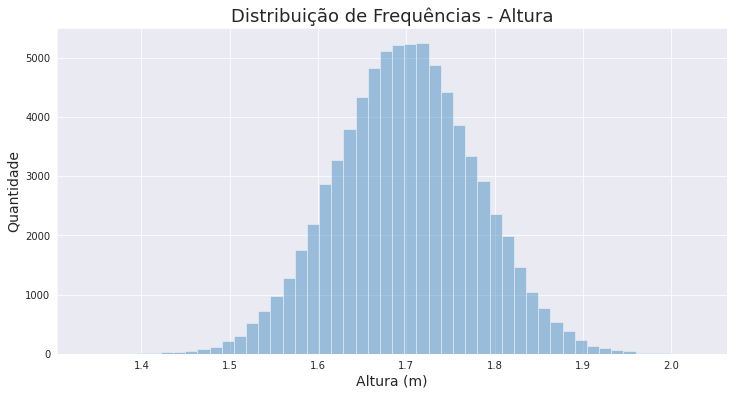

In [33]:
# usando distplot() sem a curva de densidade
sns.set_style("darkgrid")
ax = sns.distplot(a=df.altura, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
bx = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


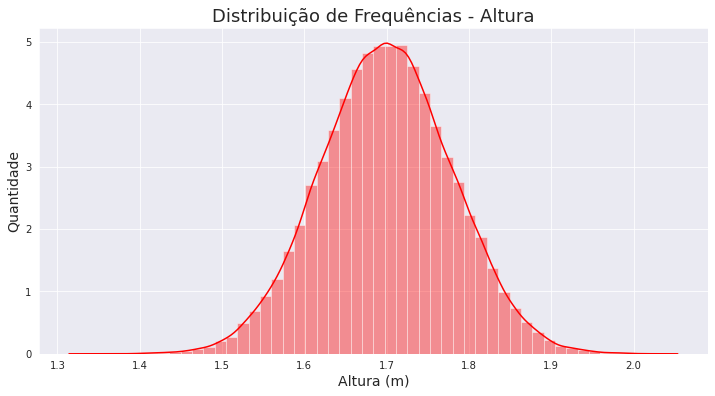

In [34]:
# usando distplot() com a curva de densidade
ax = sns.distplot(a=df.altura, color='red')

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
bx = ax

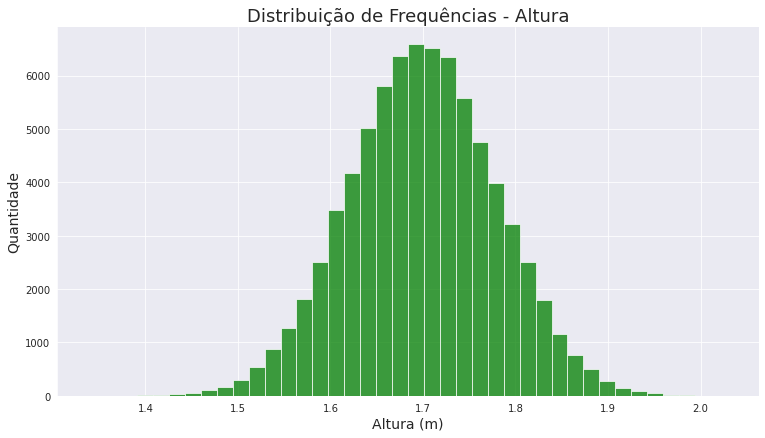

In [35]:
# displot() definindo legendas com plt
ax = sns.displot(data=df.altura, color='green', bins=40)

ax.figure.set_size_inches(12, 6)
plt.title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

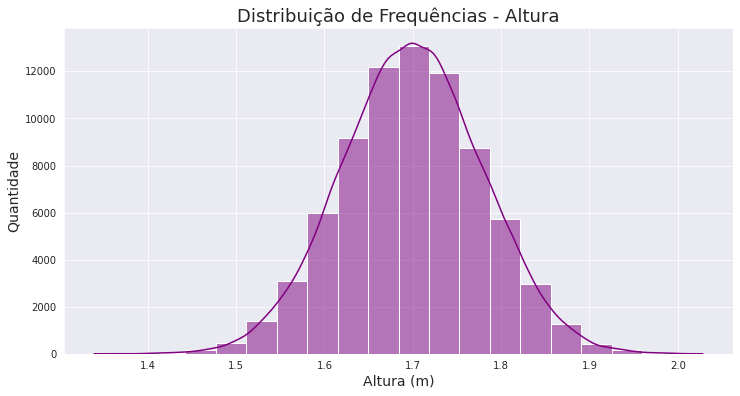

In [36]:
# histplot() separando os dados em 20 classes, com curva de densidade e definindo legendas com plt
ax = sns.histplot(data=df.altura, bins=20, kde=True, color='purple')

ax.figure.set_size_inches(12, 6)
plt.title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

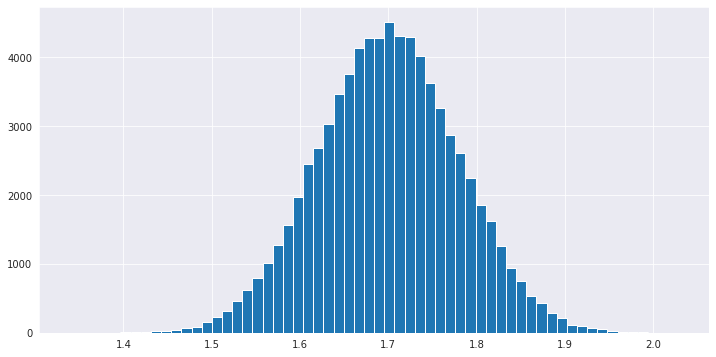

In [37]:
# usanso pandas para plotar
ax = df.altura.hist(bins=60, figsize=(12, 6))

Podemos tamb√©m fazer um histograma a partir de uma fun√ß√£o que gera um gr√°fico de barras, vamos usar a distribui√ß√£o de frequ√™ncias da renda que foi classificada nas classes de A-E:

In [38]:
dist_freq_quantitativa_personalizada

Frequencia  Percentual
A         608       0.008
B        2178       0.028
C        7599       0.099
D       16700       0.217
E       49755       0.648

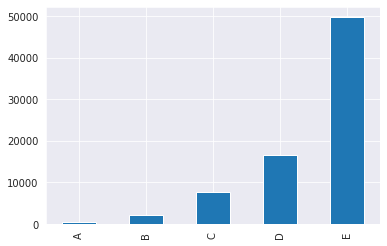

In [39]:
# grafico de barras
ax = dist_freq_quantitativa_personalizada.Frequencia.plot.bar()

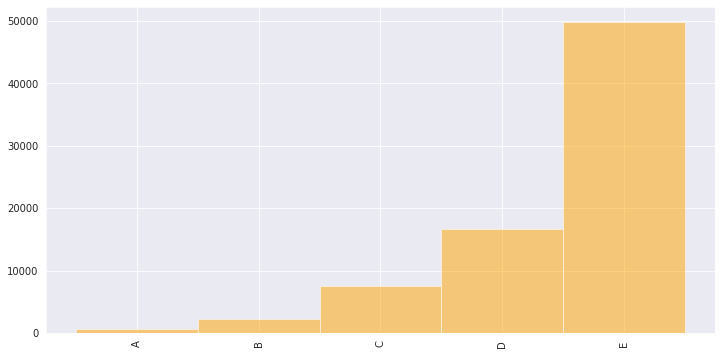

In [40]:
# histograma
ax = dist_freq_quantitativa_personalizada.Frequencia.plot.bar(width=1, color='orange', alpha=0.5, figsize=(12, 6))

## 3 Medidas de tend√™ncia central

In [41]:
notas = pd.DataFrame(
    data={'Joao':  [8,  10,   4, 8, 6,  10,  8],
          'Maria': [10,  2, 3, 1, 3, 9.5, 10],
          'Bruno': [7.5, 8,   7, 8, 8, 8.5,  7]}
    ,index=['matematica', 'portugues', 'ingles', 'geografia', 'historia', 'fisica', 'quimica']
).rename_axis('materias', axis='columns')
notas

materias    Joao  Maria  Bruno
matematica     8   10.0    7.5
portugues     10    2.0    8.0
ingles         4    3.0    7.0
geografia      8    1.0    8.0
historia       6    3.0    8.0
fisica        10    9.5    8.5
quimica        8   10.0    7.0

### 3.1 M√©dia aritm√©tica

As medidas de tend√™ncia central tem por objetivo sumarizar nossos dados de forma a facilitar seu entendimento, partindo de uma amostra com milhares de observa√ß√µes e chegando a uma √∫nica medida que nos ajude a compreender o comportamente do todo.

A **m√©dia** pode ser entendida como o _"centro de massa"_ da distribui√ßao de uma vari√°vel. Ela representa o ponto de equil√≠brio dessa distribui√ß√£o e, sendo assim, √© muito sens√≠vel aos extremos da distribui√ß√£o. Por isso, existem situa√ß√µes em que a **m√©dia** pode n√£o ser a medida mais indicada para representar uma vari√°vel.

Matem√°ticamente a m√©dia aritm√©tica $ \mu $, para uma popula√ß√£o, √© representada pela seguinte equa√ß√£o:

$ \mu = \frac{1}{n} \; \sum \limits _{i=1} ^{n} X_{i} $

onde $ n $ √© o n√∫mero de observa√ß√µes (registros) e $ X_{i} $ √© o valor da i-√©sima observa√ß√£o (registro). Ou seja, √© a divis√£o da soma de todos os valores observados pelo n√∫mero de observa√ß√µes. Tamb√©m podemos usar $ \hat X $ para denotar a m√©dia de uma amostra.

Como exemplo, vamos calcular a **m√©dia** de todas as notas do Jo√£o, primeiro "na m√£o" e depois usando um m√©todo do Pandas:

In [42]:
notas.Joao.to_list()

[8, 10, 4, 8, 6, 10, 8]

In [43]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [44]:
# usando Pandas
notas.Joao.mean()

7.714285714285714

Note que nem todas vari√°veis podem ter sua m√©dia calculada, √© o caso das vari√°veis qualitativas, por exemplo, `sexo`, `cor` e `uf` no df do PNAD. O que podemos fazer √© calcular a m√©dia de vari√°veis quantitativas em fun√ß√£o das vari√°veis qualitativas.

In [45]:
df.groupby(by=['sexo']).mean()

uf      idade       cor  anos_de_estudo        renda    altura
sexo                                                                       
0     31.901991  44.046554  5.038685        9.120169  2192.441596  1.699443
1     31.937728  44.127554  5.018906       10.258584  1566.847393  1.699670

Na sa√≠da acima observamos exatamente como a m√©dia de vari√°veis qualitativas n√£o faz sentido. Para alguns casos de vari√°veis qualitativas ordinais, ainda pode ser que seja poss√≠vel obter um significado v√°lido para essa medida, mas via de regra √© uma medida reservada √†s vari√°veis num√©ricas.

In [46]:
df.groupby(by=['sexo'])[['idade', 'renda', 'altura']].mean()

idade        renda    altura
sexo                                  
0     44.046554  2192.441596  1.699443
1     44.127554  1566.847393  1.699670

### 3.2 Mediana

A **mediana** √© a medida que separa ao meio uma s√©rie de valores. Ou seja, ap√≥s ordenar minha s√©rie de valores vou ter metadade dos valores de um lado da  **mediana** e a outra metada no outro lado.

Para determinar a mediana temos alguns passos que nos auxiliam, primeiro ordenamos o conjunto de dados e verificamos seu tamanho (n√∫mero de observa√ß√µes $n$), para determinar se o $n$ √© _par_ ou _√≠mpar_. Se for _par_, a posi√ß√£o do elemento mediado √© dada por $ S_{Md} \; = \; \frac{n}{2} $, e _√≠mpar_ por $ S_{Md} \; = \; \frac{n+1}{2} $.

No caso de um conjunto de tamanho √≠mpar, a mediana ser√° o valor que est√° na posi√ß√£o mediana: $ Md \; = \; X_{S_{Md}} $. Para um $n$ par devemos fazer $ Md \; = \; \frac{X_{S_{Md}} \; + \; X_{S_{Md}+1}}{2} $.

Como exemplo vamos novamente usar as notas do Jo√£o, primeiro calculando a **mediana** "na m√£o" e depois usando um m√©todo do Pandas:

In [47]:
notas.Joao

matematica     8
portugues     10
ingles         4
geografia      8
historia       6
fisica        10
quimica        8
Name: Joao, dtype: int64

In [48]:
# notas ordenadas e com indices que representam a posicao de cada elemento
notas_ordenadas_joao = notas.Joao.sort_values()
n = notas_ordenadas_joao.shape[0]
print(f"{n} notas\n")
notas_ordenadas_joao.index = range(1, n+1)
notas_ordenadas_joao

7 notas



1     4
2     6
3     8
4     8
5     8
6    10
7    10
Name: Joao, dtype: int64

In [49]:
print(f"n={n} √© {'par' if n % 2 == 0 else '√≠mpar'}")

n=7 √© √≠mpar


In [50]:
# posicao mediana
s_med = int((n + 1) / 2)
s_med

4

In [51]:
# valor da mediana
notas_ordenadas_joao[s_med]

8

In [52]:
# usando Pandas
notas.Joao.median()

8.0

Vamos determinar a **mediana** para as as notas da Maria agora, mas retirando aleat√≥riamente uma delas, para que nossa amostra tenha um n√∫mero _par_ de observa√ß√µes.

In [53]:
notas_maria = notas.Maria.sample(6, random_state=1)
notas_maria

quimica       10.0
ingles         3.0
portugues      2.0
matematica    10.0
historia       3.0
geografia      1.0
Name: Maria, dtype: float64

In [54]:
# notas ordenadas e com indices que representam a posicao de cada elemento
notas_ordenadas_maria = notas_maria.sort_values()
n = notas_ordenadas_maria.shape[0]
print(f"{n} notas\n")
notas_ordenadas_maria.index = range(1, n+1)
notas_ordenadas_maria

6 notas



1     1.0
2     2.0
3     3.0
4     3.0
5    10.0
6    10.0
Name: Maria, dtype: float64

In [55]:
print(f"n={n} √© {'par' if n % 2 == 0 else '√≠mpar'}")

n=6 √© par


In [56]:
# posicao mediana do conjunto ordenado
s_med = int(n / 2)
s_med

3

In [57]:
# valor na posicao mediana
x_med_0 = notas_ordenadas_maria[s_med]
x_med_0

3.0

In [58]:
# valor na posicao seguinte a mediana
x_med_1 = notas_ordenadas_maria[s_med+1]
x_med_1

3.0

In [59]:
# valor da mediana
(x_med_0 + x_med_1) / 2

3.0

In [60]:
# usando Pandas
notas_maria.median()

3.0

Agora podemos determinar a mediana para algumas de nossas vari√°veis do _dataset_ do PNAD.

In [61]:
df.groupby(by=['sexo'])[['idade', 'renda', 'altura']].median()

idade   renda    altura
sexo                         
0      43.0  1350.0  1.699249
1      44.0   900.0  1.699573

In [62]:
df.groupby(by=['cor'])[['idade', 'renda', 'altura']].quantile()

idade   renda    altura
cor                         
0     41.0   788.0  1.703850
2     45.0  1500.0  1.699406
4     43.0  1000.0  1.699658
6     45.0  2450.0  1.693964
8     42.0  1000.0  1.699237

### 3.3 Moda

A **moda** √© definida como _"o valor mais frequente em um conjunto de dados"_.

Essa medida pode ter mais de um valor para um conjunto, no caso de termos dois valores para a moda em um conjunto de dados dizemos ter uma vari√°vel **bimodal** e mais do que duas j√° dizemos **multimodal**.

Essa estat√≠stica descritiva √© muito √∫til para vari√°veis qualitativas.


In [63]:
# moda para a distribui√ß√£o de notas de cada aluno
notas.mode()

materias  Joao  Maria  Bruno
0          8.0    3.0    8.0
1          NaN   10.0    NaN

In [64]:
notas.Maria.value_counts()

10.0    2
3.0     2
2.0     1
1.0     1
9.5     1
Name: Maria, dtype: int64

Podemos ver que a distribui√ß√£o de notas para a aluna Maria √© bimodal, com as notas '3.0' e '10.0' aparecendo duas vezes cada.

Podemos explorar a **moda** nas vari√°veis do _dataset_ de rendas do PNAD:

In [65]:
df.mode()

uf  sexo  idade  cor  anos_de_estudo  renda    altura faixa_renda
0  35.0   0.0   40.0  8.0            12.0  788.0  1.568128           E
1   NaN   NaN    NaN  NaN             NaN    NaN  1.671225         NaN
2   NaN   NaN    NaN  NaN             NaN    NaN  1.681659         NaN
3   NaN   NaN    NaN  NaN             NaN    NaN  1.692977         NaN
4   NaN   NaN    NaN  NaN             NaN    NaN  1.708163         NaN
5   NaN   NaN    NaN  NaN             NaN    NaN  1.708370         NaN
6   NaN   NaN    NaN  NaN             NaN    NaN  1.753842         NaN
7   NaN   NaN    NaN  NaN             NaN    NaN  1.779073         NaN
8   NaN   NaN    NaN  NaN             NaN    NaN  1.796462         NaN

Para as vari√°veis qualitativas `idade` e `renda` at√© faz sentido o resultado que encontramos, primeiro porque s√£o vari√°veis num√©ricas inteiras, e al√©m disso, para a `renda` temos um comportamento caracter√≠stico sendo evid√™nciado. Quando analisamos distribui√ß√µes de renda √© esperado que o valor que mais apare√ßa seja o do sal√°rio m√≠nimo.

Quando olhamos para o resultado da vari√°vel `altura` vemos que se trata de uma vari√°vel multimodal e, nesse caso, a moda n√£o nos diz muita coisa.

### 3.4 Rela√ß√£o entre M√©dia, Mediana e Moda

Ap√≥s calcularmos os valores de cada uma dessas estat√≠sticas descritivas, podemos verificar a rela√ß√£o entre essas medidas e tentar determinar o tipo de simetria da distrui√ß√£o dos dados, que pode ser:

- **Assim√©trica √† direita**: M√©dia > Mediana > Moda
- **Sim√©trica**: M√©dia = Mediana = Moda
- **Assim√©trica √† esquerda**: M√©dia < Mediana < Moda

Vamos come√ßar a determinar o tipo de distribui√ß√£o das vari√°ves do _dataset_ de renda do PNAD, avaliando essas medidas descritivas. Come√ßando pela vari√°vel `renda`:

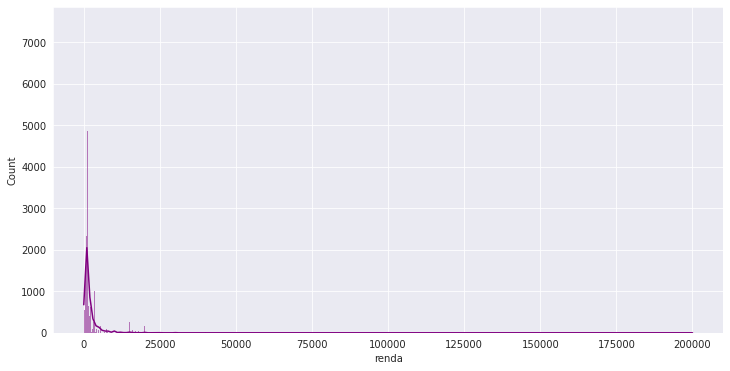

In [66]:
ax = sns.histplot(data=df.renda, kde=True, color='purple')
ax.figure.set_size_inches(12, 6)
# ax.set(ylim=(0, 2500))

Plotando a distribui√ß√£o completa mal conseguimos ver o o formato da distribui√ß√£o, tamanha a assimetria √† direita. Ent√£o olhando para o _range_ do eixo `renda` lembramos que existe uma pessoa com renda de R\$ 200.000,00 em nosso _dataset_, que muito provavelmente √© um dos (se n√£o o principal) ponto respons√°vel pela assimetria. Podemos selecionar apenas os pontos com renda inferior a R\$ 20.000,00 e plotar o gr√°fico novamente:

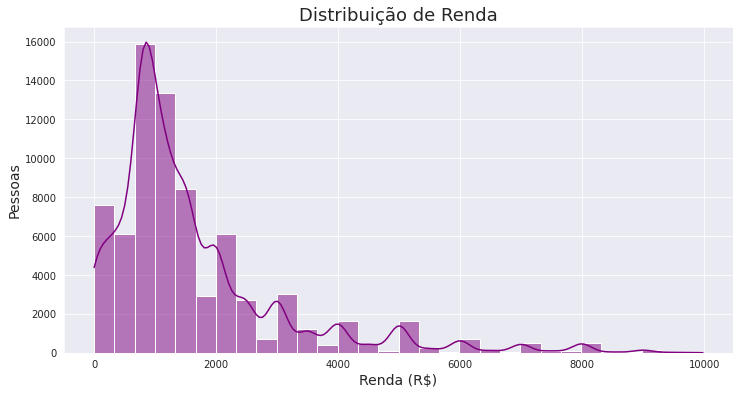

In [67]:
ax = sns.histplot(data=df.query("renda < 10000").renda, bins=30, kde=True, color='purple')
ax.figure.set_size_inches(12, 6)
plt.title('Distribui√ß√£o de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

In [68]:
moda_renda = df.renda.mode()[0]
moda_renda

788

In [69]:
mediana_renda = df.renda.median()
mediana_renda

1200.0

In [70]:
media_renda = df.renda.mean()
media_renda

2000.3831988547631

Passamos agora para a vari√°vel `altura`, que j√° sabemos ser uma vari√°vel multimodal:

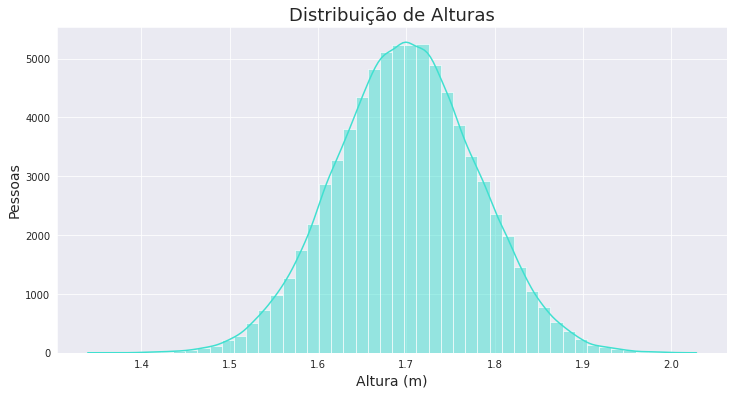

In [71]:
ax = sns.histplot(data=df.altura, bins=50, kde=True, color='turquoise')
ax.figure.set_size_inches(12, 6)
plt.title('Distribui√ß√£o de Alturas', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

In [72]:
modas_altura = df.altura.mode()
modas_altura

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [73]:
# m√©dia das modas (apenas para fins de compara√ß√£o)
moda_altura = modas_altura.mean()
moda_altura

1.7066552394444443

In [74]:
mediana_altura = df.altura.median()
mediana_altura

1.6993247325

In [75]:
media_altura = df.altura.mean()
media_altura

1.6995124540575812

Apesar de os valores das medidas descritivas n√£o serem exatamente iguais, eles s√£o muito pr√≥ximos. Al√©m disso o gr√°fico da distribui√ß√£o tem o formato de sino t√£o desejado, portanto, podemos dizer que a altura √© uma vari√°vel com distribui√ß√£o normal.

E por fim podemos ver como fica a vari√°vel `anos_de_estudo`:

In [76]:
ax = sns.histplot(data=df.anos_de_estudo, bins=17, kde=True, color='red', alpha=0.4)
ax.figure.set_size_inches(12, 6)
plt.title('Distribui√ß√£o dos Anos de Estudo', fontsize=18)
plt.xlabel('Anos de Estudo', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

Vemos aqui um gr√°fico um pouco diferente dos anteriores, com v√°rios vales e picos bem definidos. Esses picos podem ser relacionados com os anos "completos", a quantidade de anos necess√°ria para completar o ensino colegial ou o ensino superior.

Mesmo com esse formato podemos "chutar" que se trata de uma vari√°vel com distribui√ß√£o assim√©trica √† esquerda. Verificando:

In [77]:
moda_anos_de_estudo = df.anos_de_estudo.mode()[0]
moda_anos_de_estudo

12

In [78]:
mediana_anos_de_estudo = df.anos_de_estudo.median()
mediana_anos_de_estudo

11.0

In [79]:
media_anos_de_estudo = df.anos_de_estudo.mean()
media_anos_de_estudo

9.469664237376367

In [80]:
# aplicando o "teste"
for variavel in ['renda', 'anos_de_estudo']:
    print(f"A vari√°vel `{variavel}` possui:\n",
        f"- Assimetria √† direita: \t{df[variavel].mean() > df[variavel].median() > df[variavel].mode()[0]}\n",
        f"- Simetria normal: \t\t{df[variavel].mean() == df[variavel].median() == df[variavel].mode()[0]}\n",
        f"- Aimetria √† direita: \t\t{df[variavel].mean() < df[variavel].median() < df[variavel].mode()[0]}\n")

A vari√°vel `renda` possui:
 - Assimetria √† direita: 	True
 - Simetria normal: 		False
 - Aimetria √† direita: 		False

A vari√°vel `anos_de_estudo` possui:
 - Assimetria √† direita: 	False
 - Simetria normal: 		False
 - Aimetria √† direita: 		True



## 4 Medidas separatrizes

### 4.1 Quartis, decis e percentis

Na se√ß√£o anterior j√° vimos uma medida separatriz, a **mediana**, que divide uma amostra de dados em duas partes iguais, deixando a mesma quantidade de dados para cada lado. Dessa mesma forma temos outras medidas separatrizes, mas que separam o conjunto em mais que duas partes.

Uma caracter√≠stica interessante dessas medidas √© que elas n√£o s√£o influencidas por valores extremos. Por exemplo, a vari√°vel `renda` no _dataset_ do PNAD possui um registro de uma pessoa ganhando R\$ 200.000,00, enquanto a maioria ganha um sal√°rio m√≠nimo. Esse ponto que distoa muito dos dados restantes causa uma distor√ß√£o no valor m√©dio da distribui√ß√£o, nos levando a considerar que a m√©dia n√£o seja uma medida muito adequada para representar a vari√°vel.

Outra coisa a se considerar √© que podemos utilizar as medidas separatrizes para separar os dados em faixas de forma bastante simples.

As medidas separatrizes mais comuns s√£o: os quartis, separa a amostra em quatro partes; os decis, separa em dez partes; e os percentis, em cem partes. Para determinar os valores de cada umas dessas medidas precisamos nos ater que, ao dividir uma amostra em N partes, precisamos de N-1 divisores. Para a mediana (2 partes) precisamos de 1 divisor (0,50) e para os quartis (4 partes) devemos ter 3 (0,25, 0,50 e 0,75).

Vamos come√ßar usando o m√©todo `quantile()`:

In [81]:
# por padr√£o retorna o valor da mediana
df.renda.quantile()

1200.0

In [82]:
# calculando mediana explicitamente
df.renda.quantile(q=0.5)

1200.0

Esse m√©todo tamb√©m funciona recebendo uma lista em que informamos os valores que queremos. Se quisermos calcular os quartis devemos saber que o primeiro quartil √© o valor em que temos os primeiros 25% dos dados abaixo dele e 75% acima, e assim por diante:

In [83]:
# calculando os quartis
df.renda.quantile(q=[0.25, 0.50, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: renda, dtype: float64

In [84]:
# gera os divisores para calcular os decis
# lembrando que como s√£o dez intervalos, precisamos de 9 divisores
divisores_decis = [i/10 for i in range(1, 10)]
divisores_decis

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [85]:
# calculando os decis
df.renda.quantile(q=divisores_decis)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: renda, dtype: float64

In [86]:
# gera os divisores para calcular os percentis
divisores_percentis = [i/100 for i in range(1, 100)]

In [87]:
# calculando os percentis
percentis_renda = df.renda.quantile(q=divisores_percentis)
percentis_renda

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: renda, Length: 99, dtype: float64

Uma coisa interessante √© que a medida que aumentamos os intervalos em que os dados s√£o separados podemos obter uma maior granularidade na informa√ß√£o que estamos interessado. Por exemplo, de acordo com os decis dir√≠amos que 20% dos entrevistados ganham at√© um sal√°rio m√≠nimo. Mas com os percentis podemos ver que 28% dos entrevistados ganham at√© um sal√°rio m√≠nimo.

In [88]:
percentis_renda.iloc[25:30]

0.26    788.0
0.27    788.0
0.28    788.0
0.29    789.0
0.30    800.0
Name: renda, dtype: float64

Vamos calcular os decis para a vari√°vel `idade` e plotar um gr√°fico de distribui√ß√£o de frequ√™ncias acumuladas para comparar os resultados:

In [89]:
# decis para idade
df.idade.quantile(q=divisores_decis)

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: idade, dtype: float64

In [90]:
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.figure.set_size_inches(14, 6)
plt.title('Distribui√ß√£o de Frequ√™ncias Acumulada', fontsize=18)
plt.xlabel('Acumulado', fontsize=14)
plt.ylabel('Idade (ano)', fontsize=14)
bx = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


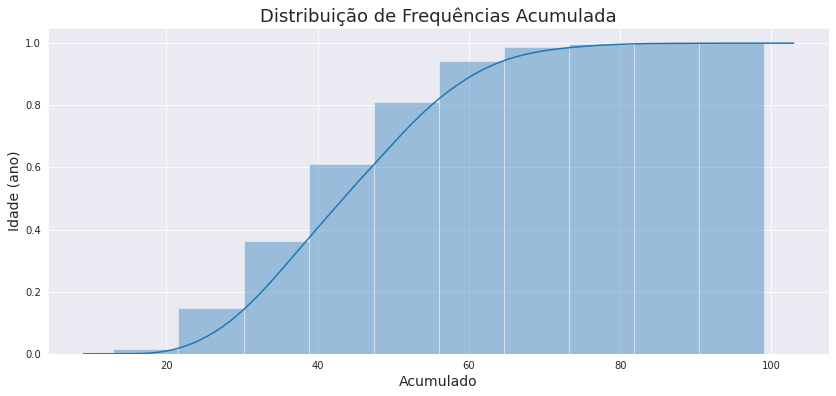

In [91]:
# mesmo gr√°fico, mas com 10 bins
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=10)
ax.figure.set_size_inches(14, 6)
plt.title('Distribui√ß√£o de Frequ√™ncias Acumulada', fontsize=18)
plt.xlabel('Acumulado', fontsize=14)
plt.ylabel('Idade (ano)', fontsize=14)
bx = ax

### 4.2 Boxplot

O gr√°fico de boxplot nos d√° uma id√©ia da posi√ß√£o, dispers√£o, assimetria, caudas e _outliers_ do conjunto de dados. As posi√ß√µes relativas de $Q1$ (25% dos dados ficam abaixo desse valor e 75% acima), $Mediana$ (posi√ß√£o central) e $Q3$ (75% dos dados ficam abaixo) s√£o os quartis e nos d√£o uma no√ß√£o da simetria da distribui√ß√£o. A dispers√£o √© dada pela dist√¢ncia entre os quartis $Q1$ e $Q3$, que √© chamado de Intervalo Inter Quartil ($IIQ$). Os limites superior e inferior dependem dos quartis mais pr√≥ximos e do $IIQ$ e nos permitem identificar dados que podem ser _outliers_ (valores discrepantes).

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='50%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='60%'>

Come√ßamos plotando um boxplot apenas para a vari√°vel `altura` e depois abrindo pela vari√°vel `sexo`:

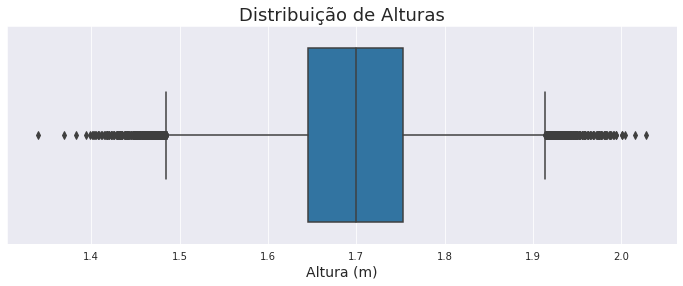

In [92]:
ax = sns.boxplot(x='altura', data=df, orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Alturas', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
bx = ax

In [93]:
ax = sns.boxplot(data=df, x='altura', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Alturas por Sexo', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

Note que `altura` se trata de uma vari√°vel bem sim√©trica. Ent√£o vamos fazer o mesmo gr√°fico para `renda` agora:

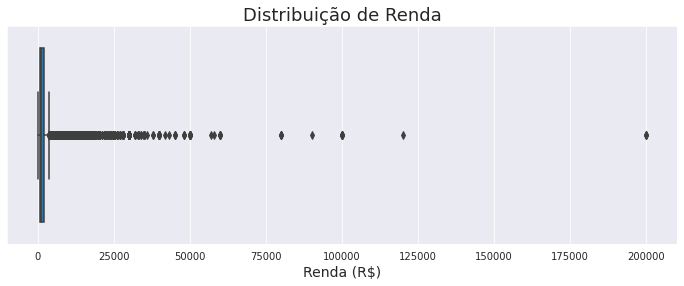

In [94]:
ax = sns.boxplot(data=df, x='renda', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
bx = ax

Fica bem evidente a assimetria √† direita, inclusive aquele ponto nos R\$ 200.000,00. Vamos selecionar os dados usados no plot apenas para fins de facilitar a visualiza√ß√£o:

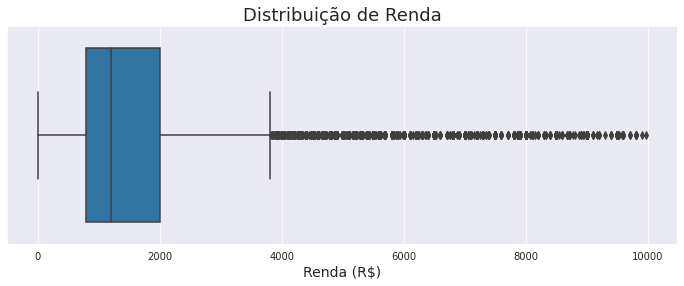

In [95]:
ax = sns.boxplot(data=df.query("renda < 10000"), x='renda', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
bx = ax

In [96]:
ax = sns.boxplot(data=df.query("renda < 10000"), x='renda', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

Quando abrimos a distribui√ß√£o por sexo j√° somos capazes de ver que existe uma diferen√ßa de renda entre homens e mulheres.

Vamos passar para a vari√°vel `anos_de_estudo` agora, fingindo que se tratam de tempo em anos e n√£o classes:

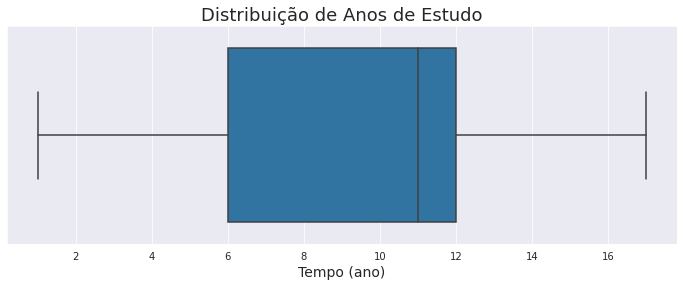

In [97]:
ax = sns.boxplot(data=df, x='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Anos de Estudo', fontsize=18)
plt.xlabel('Tempo (ano)', fontsize=14)
bx = ax

In [98]:
ax = sns.boxplot(data=df, x='anos_de_estudo', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribui√ß√£o de Anos de Estudo', fontsize=18)
plt.xlabel('Tempo (ano)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

No primeiro gr√°fico observamos uma distribui√ß√£o assim√©trica √† esquerda e no segundo vemos que as mulheres possuem mais tempo de escolaridade que os homens. Aqui podemos ver qu√£o interessante √© esse tipo de gr√°fico, a partir dele somos capazes de verificar que as mulheres estudam mais que os homens e apesar disso ganham menos.

## 5 Medidas de dispers√£o

Embora as medidas de posi√ß√£o forne√ßam uma sumariza√ß√£o bastante importante dos dados, elas podem n√£o ser suficientes para caracterizar conjuntos distintos, especialmente quando as observa√ß√µes de determinada distribui√ß√£o apresentarem dados muito dispersos.

Vamos pegar como exemplo as notas tratadas na se√ß√£o 3 e calcular as medidas de tend√™ncia central:

In [99]:
notas

materias    Joao  Maria  Bruno
matematica     8   10.0    7.5
portugues     10    2.0    8.0
ingles         4    3.0    7.0
geografia      8    1.0    8.0
historia       6    3.0    8.0
fisica        10    9.5    8.5
quimica        8   10.0    7.0

In [100]:
notas.mean()

materias
Joao     7.714286
Maria    5.500000
Bruno    7.714286
dtype: float64

In [101]:
notas.median()

materias
Joao     8.0
Maria    3.0
Bruno    8.0
dtype: float64

In [102]:
notas.mode()

materias  Joao  Maria  Bruno
0          8.0    3.0    8.0
1          NaN   10.0    NaN

Podemos ver que os alunos Jo√£o e Bruno possuem o mesmo valor para as tr√™s grandezas estat√≠sticas (m√©dia, mediana e moda). Mas se analisarmos as notas desses dois alunos veremos que Bruno √© mais consistente, n√£o tendo nenhuma nota abaixo de sete, enquanto Jo√£o claramente da mais aten√ß√£o para algumas mat√©rias que outras. Ou seja, estamos vendo que as notas de Jo√£o possuem uma dispers√£o maior que as de Bruno. 

Dessa forma fica claro que essas medidas n√£o s√£o suficientes para caracterizar completamente o comportamento dessas vari√°veis, precisamos agora de medidas de dispers√£o.

### 5.1 Desvio m√©dio absoluto

√â a m√©dia aritm√©tica do _desvio absoluto_ de cada medida em rela√ß√£o √† m√©dia da vari√°vel. A formula matem√°tica para calcular essa medida √©:

$ DM \; = \; \frac{1}{n} \sum \limits _{i=1} ^{n} | x_{i} - \overline{X} | $

- onde $n$ √© o n√∫mero de observa√ß√µes da amostra
- $x_{i}$ √© a i-√©sima observa√ß√£o
- $\overline{X}$ √© a m√©dia aritm√©tica da amostra

Primeiro vamos calcular o **desvio m√©dio** na m√£o para as notas de Jo√£o e Bruno:

In [103]:
# cria df com apenas a coluna de notas de Jo√£o
notas_joao = notas[['Joao']]
notas_joao.columns = ['nota']
notas_joao

nota
matematica     8
portugues     10
ingles         4
geografia      8
historia       6
fisica        10
quimica        8

In [104]:
# calcula nota m√©dia de Jo√£o
media_joao = notas_joao.mean()[0]
media_joao

7.714285714285714

In [105]:
# adiciona coluna com desvio de cada nota em rela√ß√£o a m√©dia
notas_joao['desvio'] = notas_joao['nota'] - media_joao
notas_joao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nota    desvio
matematica     8  0.285714
portugues     10  2.285714
ingles         4 -3.714286
geografia      8  0.285714
historia       6 -1.714286
fisica        10  2.285714
quimica        8  0.285714

In [106]:
# cria coluna com o desvio absoluto
notas_joao['desvio_abs'] = notas_joao.desvio.abs()
notas_joao

nota    desvio  desvio_abs
matematica     8  0.285714    0.285714
portugues     10  2.285714    2.285714
ingles         4 -3.714286    3.714286
geografia      8  0.285714    0.285714
historia       6 -1.714286    1.714286
fisica        10  2.285714    2.285714
quimica        8  0.285714    0.285714

Vamos plotar um gr√°fico de pontos para as notas mostrando a localiza√ß√£o da nota m√©dia, o que nos permite visualizar o resultado de somar os valores de desvio √© zero:

In [107]:
ax = notas_joao.nota.plot(style='o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y=media_joao, xmin=0, xmax=notas_joao.shape[0]-1, colors='red')
for i in range(notas_joao.shape[0]):
    ax.vlines(x=i, ymin=notas_joao, ymax=notas_joao.nota[i], linestyles='dashed')
plt.title('Desvio das notas em rela√ß√£o √† M√©dia', fontsize=18)
plt.ylabel('Notas', fontsize=14)
bx = ax

In [108]:
# soma todos os desvios
notas_joao.desvio.sum()

-8.881784197001252e-16

In [109]:
# suprime apresenta√ß√£o em nota√ß√£o cient√≠fica
f"{notas_joao.desvio.sum():.20f}"

'-0.00000000000000088818'

Agora sim, calculamos o valor do **desvio m√©dio absoluto**:

In [110]:
# na m√£o
notas_joao.desvio_abs.sum() / notas_joao.shape[0]

1.5510204081632648

In [111]:
# um pouco menos na m√£o
notas_joao.desvio_abs.mean()

1.5510204081632648

In [112]:
# enfim, com Pandas
notas_joao.nota.mad()

1.5510204081632648

In [113]:
notas.Joao.mad()

1.5510204081632648

In [114]:
notas.Bruno.mad()

0.4693877551020408

### 5.2 Vari√¢ncia

Muito similar a forma como √© calculado o desvio m√©dio temos a **vari√¢ncia**. Mas aqui n√£o fazemos o devio absoluto em rela√ß√£o √† m√©dia, mas sim o _quadrado do desvio_. Dessa forma, quanto mais discrepante um ponto for, maior ser√° o peso que ele ter√° nessa medida. Ou seja, quanto mais dispersa a distribui√ß√£o for, mais penalizada ser√°.

Outra diferen√ßa que temos em rela√ß√£o √† medida anterior eh que possu√≠mos duas f√≥rmulas matem√°ticas: uma para dados populacionais e outra para amostrais. Como praticamente sempre estamos trabalhando com dados amostrais, dificilmente usaremos uma delas.

- vari√¢ncia populacional: $ \; {œÉ}^2 \; = \; \frac{1}{n} \sum \limits _{i=1} ^{n} {( x_{i} - ùúá )}^2 $

- vari√¢ncia amostral: $ \; {œÉ}^2 \; = \; \frac{1}{n-1} \sum \limits _{i=1} ^{n} {( x_{i} - \overline{X} )}^2 $

Vamos come√ßar partindo do df de notas do Jo√£o, adicionando uma coluna para o desvio elevado ao quadrado:

In [115]:
# eleva ao quadrado o desvio em rela√ß√£o √° media 
notas_joao['desvio_square'] = notas_joao.desvio ** 2
notas_joao

nota    desvio  desvio_abs  desvio_square
matematica     8  0.285714    0.285714       0.081633
portugues     10  2.285714    2.285714       5.224490
ingles         4 -3.714286    3.714286      13.795918
geografia      8  0.285714    0.285714       0.081633
historia       6 -1.714286    1.714286       2.938776
fisica        10  2.285714    2.285714       5.224490
quimica        8  0.285714    0.285714       0.081633

In [116]:
# calcula vari√¢ncia amostral na m√£o
variancia_notas_joao = notas_joao.desvio_square.sum() / (len(notas_joao)-1)
variancia_notas_joao

4.57142857142857

In [117]:
# calcula do jeito Pandas
notas_joao.nota.var()

4.57142857142857

In [118]:
notas.Joao.var()

4.57142857142857

In [119]:
notas.Bruno.var()

0.32142857142857145

### 5.3 Desvio padr√£o

Uma dificuldade associada √† **vari√¢ncia** √© o fato de que sua unidade de medida √© o quadrado da unidade original, e isso causa dificuldade ao comparar a dispers√£o com a vari√°vel que a define. Por exemplo, a vari√¢ncia de medidas de comprimento √© em unidades de √°rea.

Um modo de eliminar essa dificuldade √© considerar sua raiz quadrada. Ou seja, _o **desvio padr√£o** √© a ra√≠z quadrada da **vari√¢ncia**._

As f√≥rmulas ficam:

- desvio padr√£o populacional: $ \; œÉ \; = \; \sqrt{ \frac{1}{n} \sum \limits _{i=1} ^{n} {( x_{i} - ùúá )}^2 } \; \Longrightarrow \; œÉ = \sqrt{ {œÉ}^2 } $

- desvio padr√£o amostral: $ \; S \; = \; \sqrt{ \frac{1}{n-1} \sum \limits _{i=1} ^{n} {( x_{i} - \overline{X} )}^2 } \; \Longrightarrow \; S = \sqrt{ {S}^2 } $

J√° temos a **vari√¢ncia** das notas do Jo√£o, calculada na etapa anterior, ent√£o vamos tirar sua ra√≠z quadrada para obter o **desvio padr√£o** amostral:

In [120]:
np.sqrt(variancia_notas_joao)

2.1380899352993947

In [121]:
variancia_notas_joao ** (1/2)

2.1380899352993947

In [122]:
# jeito Pandas
notas.Joao.std()

2.1380899352993947

In [123]:
notas.Bruno.std()

0.5669467095138409

Se tivessemos usado apenas as medidas de tend√™ncia central para avaliar as distribui√ß√µes de notas dos alunos Bruno e Jo√£o, n√£o seriamos capazes de ver diferen√ßas. Mas ap√≥s calcularmos as medidas de dispers√£o podemos entender como a distribui√ß√£o das notas desses alunos s√£o diferentes.

In [124]:
resumo_notas = {'media': notas.mean(),
                'mediana': notas.median(),
                'desvio_abs':notas.mad(),
                'variancia':notas.var(),
                'desvio_padrao':notas.std(),}
pd.DataFrame(resumo_notas).sort_index()

media  mediana  desvio_abs  variancia  desvio_padrao
materias                                                         
Bruno     7.714286      8.0    0.469388   0.321429       0.566947
Joao      7.714286      8.0    1.551020   4.571429       2.138090
Maria     5.500000      3.0    3.714286  16.916667       4.112988

## 6 Projeto

### 6.1 Analisando a vari√°vel `renda`

Para avaliarmos o comportamento da vari√°vel `renda` vamos construir uma tabela de frequ√™ncias considerando as seguintes classes em sal√°rios m√≠nimos (SM), considerando que o sal√°rio m√≠nimo na √©poca da pesquisa era de **R\$ 788,00**.

- A: acima de 25 SM
- B: de 15 a 25 SM
- C: de 5 a 15 SM
- D: de 2 a 5 SM
- E: at√© 2 SM

In [125]:
# define os limites das classes em SMs
limites = [2, 5, 15, 25]
limites

[2, 5, 15, 25]

In [126]:
# cria lista com: primeiro valor, limites das classes e maior valor possivel, em reais
classes = [df.renda.min()] + [788*i for i in limites] + [df.renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [127]:
classificacao_renda = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [128]:
# define os rotulos das classes
rotulos = ['E', 'D', 'C', 'B', 'A']
rotulos

['E', 'D', 'C', 'B', 'A']

In [129]:
# cria series com os valores de renda classificados de acordo com os limites em `classes`, considerando menor valor como fechado
classificacao_renda_freq = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda_freq

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [130]:
# cria coluna de frequencias
freq = pd.value_counts(classificacao_renda_freq)
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: renda, dtype: int64

In [131]:
df.shape[0] == freq.sum()

True

In [132]:
# cria coluna de distribui√ß√£o percentual
perc = pd.value_counts(classificacao_renda, normalize=True).round(3)
perc

E    0.648
D    0.242
C    0.094
B    0.011
A    0.005
Name: renda, dtype: float64

In [133]:
perc.sum() 

1.0

In [134]:
# cria df com distribui√ß√µes
df_class_renda = pd.DataFrame(data={'frequencia': freq, 'percentual': perc}).sort_index(ascending=False)
df_class_renda

frequencia  percentual
A         420       0.005
B         822       0.011
C        7241       0.094
D       18602       0.242
E       49755       0.648

In [135]:
ax = df_class_renda.frequencia.plot.bar(width=0.8, alpha=0.4, figsize=(12, 4), rot=0)
ax = df_class_renda.percentual.plot.bar(width=0.8, alpha=0.4, figsize=(12, 4), rot=0)
plt.title('Distribui√ß√£o por faixas de Renda', fontsize=18)
plt.xlabel('Faixas de Renda', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

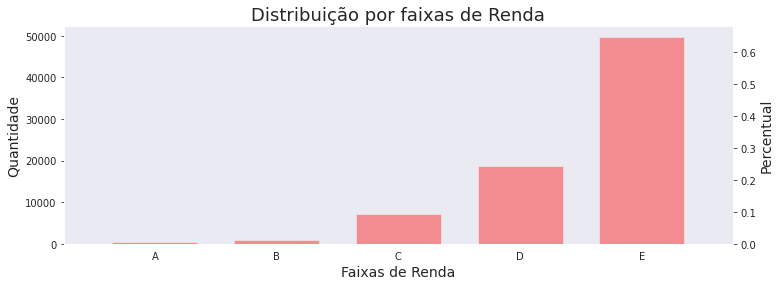

In [136]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df_class_renda.frequencia.plot(kind='bar', color='red', ax=ax, width=0.7, position=0.5, grid=False, alpha=0.4, rot=0)
df_class_renda.percentual.plot(kind='bar', color='blue', ax=ax2, width=1, position=0.5, grid=False, alpha=0, figsize=(12, 4))

ax.set_title('Distribui√ß√£o por faixas de Renda', fontsize=18)
ax.set_xlabel('Faixas de Renda', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax2.set_ylabel('Percentual', fontsize=14)

plt.show()

### 6.2 Histograma para as vari√°veis quantitativas


#### 6.2.1 Idade


In [137]:
# valores distintos para variavel `idade`
print(f"{len(df.idade.unique())} valores diferentes\n")
np.array(sorted(df.idade.unique()))

84 valores diferentes



array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 97, 99])

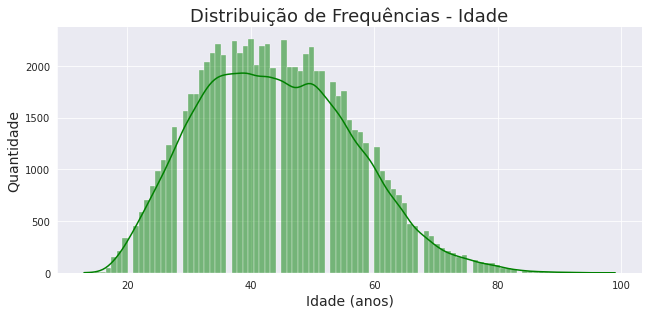

In [138]:
ax = sns.displot(data=df.idade, color='green', kde=True)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

In [139]:
ax = sns.displot(data=df.idade, color='green', kde=True, bins=42)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

In [140]:
ax = sns.displot(data=df.idade, color='green', kde=True, bins=21)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

#### 6.2.2 Altura

In [141]:
print(f"{len(df.altura.unique())} valores unicos (sem arredondar)")
print(f"{len(df.altura.round(2).unique())} valores unicos (depois de arredondar para 2 casas decimais)\n")
np.array(sorted(df.altura.round(2).unique()))

76831 valores unicos (sem arredondar)
67 valores unicos (depois de arredondar para 2 casas decimais)



array([1.34, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46,
       1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57,
       1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68,
       1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79,
       1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 ,
       1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  , 2.02,
       2.03])

In [142]:
ax = sns.histplot(data=df.altura, kde=True, color='purple')
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

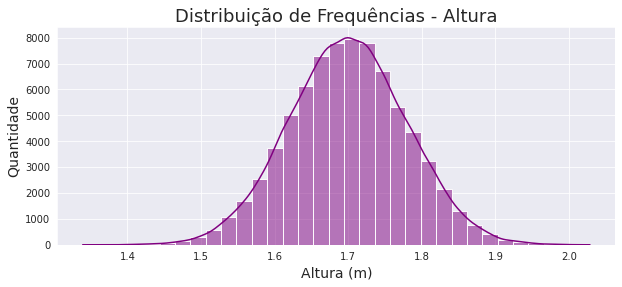

In [143]:
ax = sns.histplot(data=df.altura, bins=33, kde=True, color='purple')

ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

In [144]:
ax = sns.histplot(data=df.altura, bins=22, kde=True, color='purple')

ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

#### 6.2.3 Renda

In [145]:
print(f"{len(df.query('renda <= 20000').renda.unique())} valores √∫nicos (at√© R$ 20.000,00)")

1569 valores √∫nicos (at√© R$ 20.000,00)


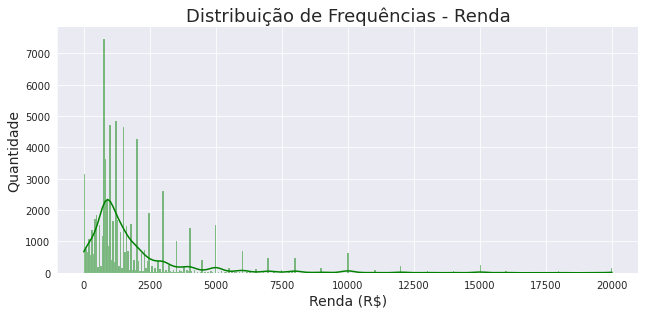

In [146]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

In [147]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True, bins=200)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

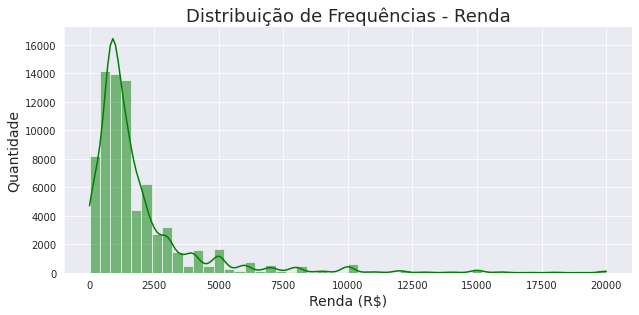

In [148]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True, bins=50)
ax.figure.set_size_inches(10, 4)
plt.title('Distribui√ß√£o de Frequ√™ncias - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

In [149]:
ax = df.query("renda <= 20000").renda.hist(bins=50, figsize=(10, 4))
plt.title('Distribui√ß√£o de Frequ√™ncias - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

### 6.3 Tabelas de frequencias e perncentuais cruzados para as vari√°veis `sexo` e `cor`

In [150]:
print(sexo)
print(cor)

{0: 'Masculino', 1: 'Feminino'}
{0: 'Ind√≠gena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declara√ß√£o'}


In [151]:
pd.crosstab(index=df.sexo, columns=df.cor).rename(index=sexo).rename(columns=cor)

cor        Ind√≠gena  Branca  Preta  Amarela  Parda
sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862

### 6.4 An√°lise descritiva para a vari√°vel `renda`

#### 6.4.1 Medidas de tend√™ncia central e dispers√£o

In [152]:
# m√©dia
df.renda.mean()

2000.3831988547631

In [153]:
# mediana
df.renda.median()

1200.0

In [154]:
# moda
df.renda.mode()

0    788
dtype: int64

In [155]:
# desvio m√©dio absoluto
df.renda.mad()

1526.4951371644931

In [156]:
# vari√¢ncia
df.renda.var()

11044906.00622118

In [157]:
# vari√¢ncia em nota√ß√£o ciet√≠fica
f"{df.renda.var():.2e}"

'1.10e+07'

In [158]:
# desvio padr√£o
df.renda.std()

3323.3877303470294

#### 6.4.2 M√©dia, mediana e valor m√°ximo da `renda` segundo `sexo` e `cor`

In [159]:
pd.crosstab(index=df.sexo, 
            columns=df.cor, 
            aggfunc=['mean', 'median', 'max'], 
            values=df.renda).rename(index=sexo).rename(columns=cor).round(2)

mean                                       median          \
cor       Ind√≠gena   Branca    Preta  Amarela    Parda Ind√≠gena  Branca   
sexo                                                                      
Masculino  1081.71  2925.74  1603.86  4758.25  1659.58    797.5  1700.0   
Feminino   2464.39  2109.87  1134.60  3027.34  1176.76    788.0  1200.0   

                                       max                                 
cor         Preta Amarela   Parda Ind√≠gena  Branca  Preta Amarela   Parda  
sexo                                                                       
Masculino  1200.0  2800.0  1200.0    10000  200000  50000   50000  100000  
Feminino    800.0  1500.0   800.0   120000  100000  23000   20000   30000

#### 6.4.3 Medidas de dispers√£o da `renda` segundo `sexo` e `cor`

In [160]:
pd.crosstab(index=df.sexo, 
            columns=df.cor, 
            aggfunc=['mad', 'var', 'std'], 
            values=df.renda).rename(index=sexo).rename(columns=cor).round(2)

mad                                              var  \
cor       Ind√≠gena   Branca   Preta  Amarela    Parda      Ind√≠gena   
sexo                                                                  
Masculino   798.91  2261.01  975.60  3709.60  1125.83  1.449841e+06   
Feminino   3007.89  1670.97  705.45  2549.15   811.58  1.429818e+08   

                                                                  std  \
cor             Branca       Preta      Amarela       Parda  Ind√≠gena   
sexo                                                                    
Masculino  22570023.41  3749293.59  32957069.62  5345747.15   1204.09   
Feminino   10569086.53  1821959.52  13921656.88  2547959.94  11957.50   

                                               
cor         Branca    Preta  Amarela    Parda  
sexo                                           
Masculino  4750.79  1936.31  5740.82  2312.09  
Feminino   3251.01  1349.80  3731.17  1596.23

#### 6.4.4 Boxplot da vari√°vel `renda` segundo `sexo` e `cor`

In [161]:
cor_rotulos = list(cor.values())
cor_rotulos

['Ind√≠gena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declara√ß√£o']

In [162]:
sexo_rotulos = ['Masculino', 'Feminino']
sexo_rotulos

['Masculino', 'Feminino']

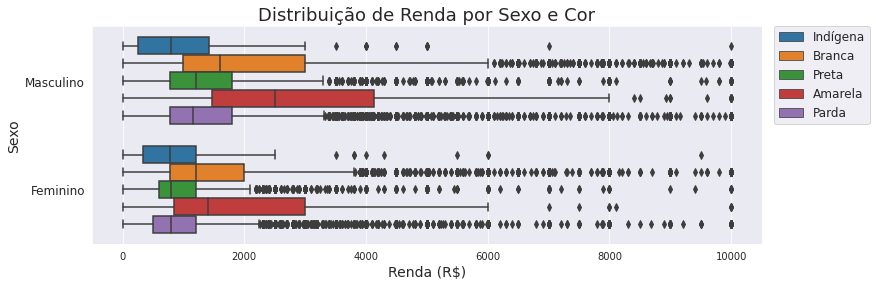

In [163]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='sexo', hue='cor', orient='h')
ax.figure.set_size_inches(12, 4)

ax.set_title('Distribui√ß√£o de Renda por Sexo e Cor', fontsize=18)

ax.set_xlabel('Renda (R$)', fontsize=14)

ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, cor_rotulos, fontsize=12, bbox_to_anchor=(1.17, 1.03))
bx = ax

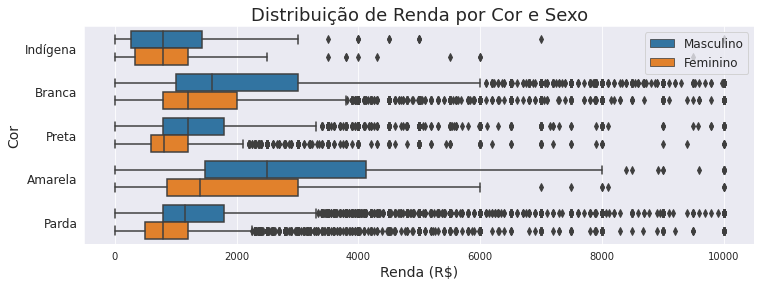

In [164]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='cor', hue='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribui√ß√£o de Renda por Cor e Sexo', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(labels=cor_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, sexo_rotulos, fontsize=12)
bx = ax

### 6.5 Desafios

#### 6.5.1 Percentual de pessoas do _dataset_ que ganham um sal√°rio m√≠nimo ou menos

Usando a fun√ß√£o `percentileofscore()` do m√≥dulo `stats` do pacote [`scipy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) podemos encontrar o percentil correspondente a um valor de corte em uma s√©rie de valores.

In [165]:
# kind='rank' √© o valor padr√£o
stats.percentileofscore(df.renda, 788)

24.390942217595004

Como estou interessado em pessoas que ganham um valor **menor ou igual** ao sal√°rio m√≠nimo uso o par√¢metro `kind='weak'`, dessa forma ser√° calculado o percentil da √∫ltima ocorr√™ncia do valor de corte:

In [166]:
stats.percentileofscore(a=df.renda, score=788, kind='weak')

28.86777719937533

Outro valor poss√≠vel para o par√¢metro `kind` √© o `'strict'`, que considera apenas a primeira ocorr√™ncia do valor de corte. `rank` retorna uma m√©dia dos perncentis de todas as ocorr√™ncias do valor de corte.

In [167]:
stats.percentileofscore(df.renda, 788, 'strict')

19.91280583029672

In [168]:
(stats.percentileofscore(df.renda, 788, 'strict') + stats.percentileofscore(a=df.renda, score=788, kind='weak'))/2

24.390291514836022

#### 6.5.2 Valor m√°ximo que 99% das pessoas do _dataset_ ganham

In [169]:
df.renda.quantile(0.99)

15000.0

#### 6.5.3 Obter a m√©dia, mediana, valor m√°ximo e desvio-padr√£o da vari√°vel `renda` segundo `anos_de_estudo` e `sexo`

In [170]:
anos_de_estudo = {1: 'Sem instru√ß√£o e menos de 1 ano', 
                  2: '1 ano', 
                  3: '2 anos', 
                  4: '3 anos', 
                  5: '4 anos', 
                  6: '5 anos', 
                  7: '6 anos', 
                  8: '7 anos', 
                  9: '8 anos', 
                  10: '9 anos', 
                  11: '10 anos', 
                  12: '11 anos', 
                  13: '12 anos', 
                  14: '13 anos', 
                  15: '14 anos', 
                  16: '15 anos ou mais', 
                  17: 'N√£o determinados'}
anos_de_estudo

{1: 'Sem instru√ß√£o e menos de 1 ano',
 2: '1 ano',
 3: '2 anos',
 4: '3 anos',
 5: '4 anos',
 6: '5 anos',
 7: '6 anos',
 8: '7 anos',
 9: '8 anos',
 10: '9 anos',
 11: '10 anos',
 12: '11 anos',
 13: '12 anos',
 14: '13 anos',
 15: '14 anos',
 16: '15 anos ou mais',
 17: 'N√£o determinados'}

In [171]:
pd.crosstab(index=df.anos_de_estudo, 
            columns=df.sexo, 
            aggfunc=['mean', 'median', 'max', 'std'], 
            values=df.renda).rename(index=anos_de_estudo).rename(columns=sexo).round(2)

mean             median           \
sexo                           Masculino Feminino Masculino Feminino   
anos_de_estudo                                                         
Sem instru√ß√£o e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
N√£o determinados                 1295.76   798.17      1200      788   

                                     max                std           
sexo                           Masculino Feminino Masculino Feminino  
anos_de_estudo                                                        
Sem instru√ß√£o e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
N√£o determinados                    7000     3000    979.65   459.99

#### 6.5.4 Boxplot da vari√°vel `renda` segundo `anos_de_estudo` e `renda`

In [172]:
anos_de_estudo_rotulos = list(anos_de_estudo.values())
anos_de_estudo_rotulos

['Sem instru√ß√£o e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'N√£o determinados']

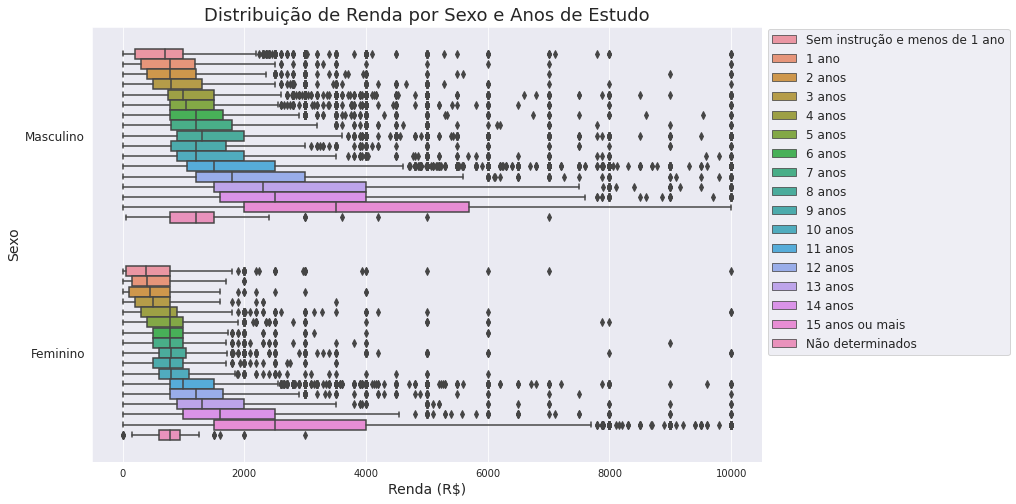

In [173]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribui√ß√£o de Renda por Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

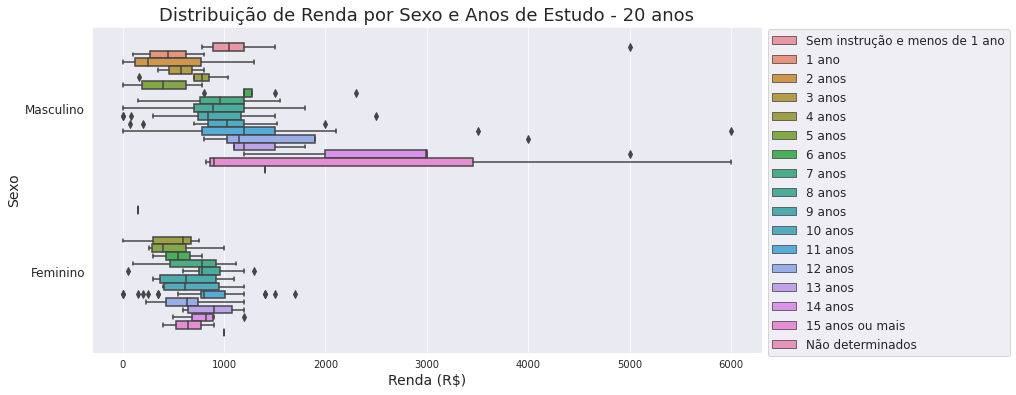

In [174]:
idade = 20
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title(f"Distribui√ß√£o de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

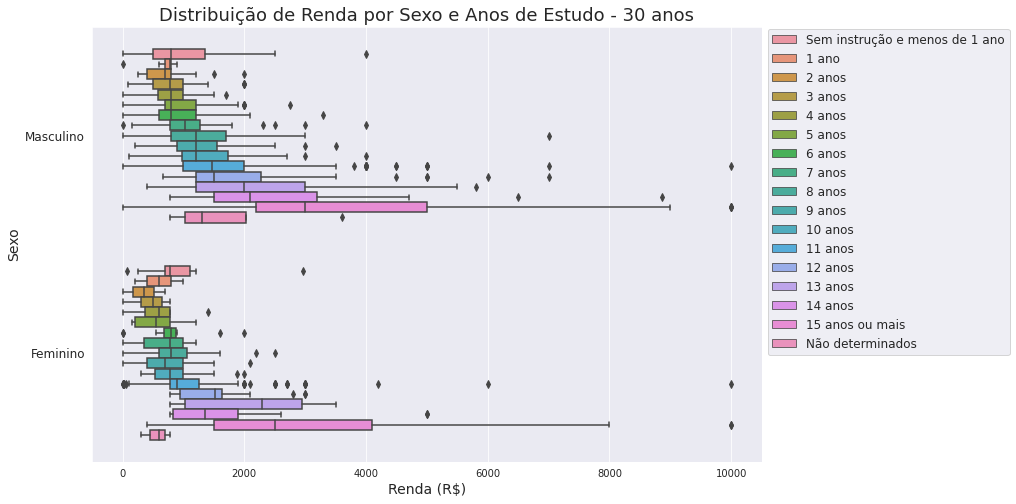

In [175]:
idade = 30
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribui√ß√£o de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

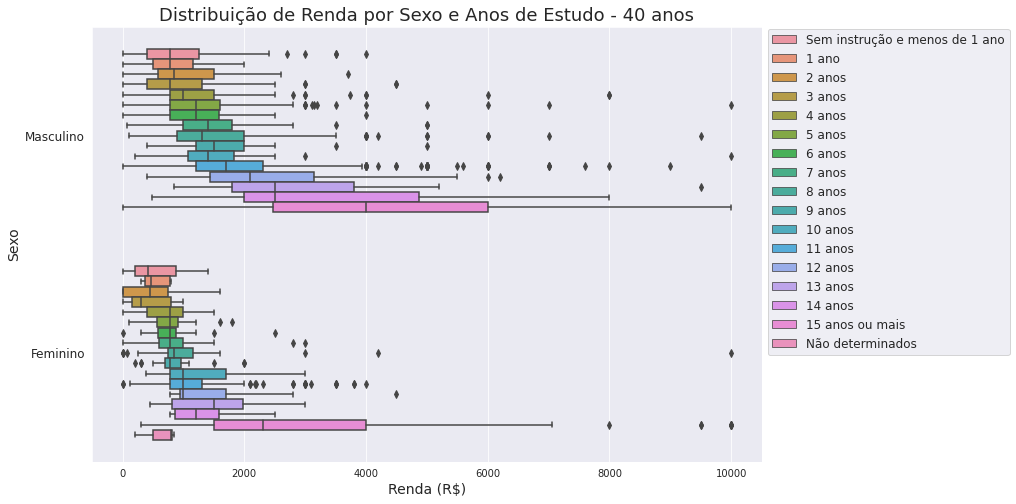

In [176]:
idade = 40
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribui√ß√£o de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

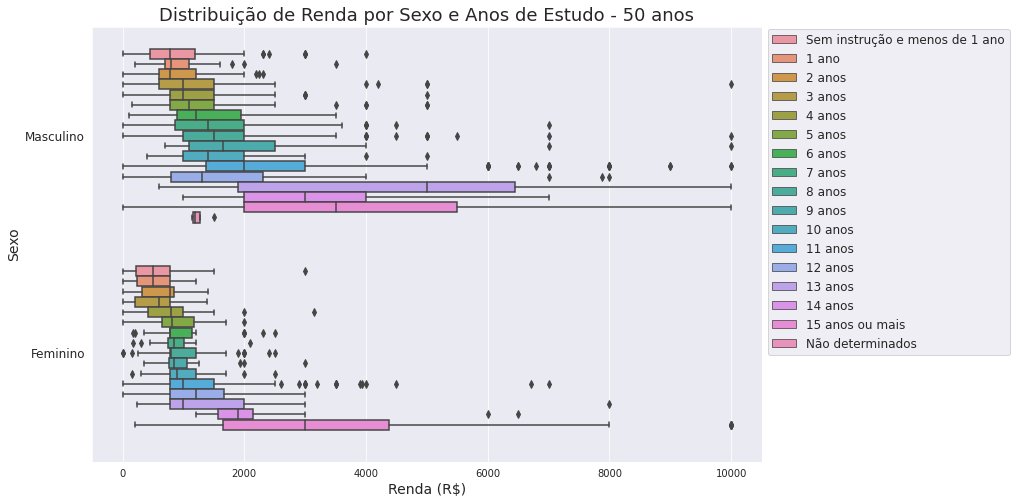

In [177]:
idade = 50
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribui√ß√£o de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

#### 6.5.5 Obter a m√©dia, mediana, valor m√°ximo e desvio-padr√£o da vari√°vel `renda` segundo as Unidade da Federa√ß√£o

In [178]:
uf = {11: 'Rond√¥nia', 
      12: 'Acre', 
      13: 'Amazonas', 
      14: 'Roraima', 
      15: 'Par√°', 
      16: 'Amap√°', 
      17: 'Tocantins', 
      21: 'Maranh√£o', 
      22: 'Piau√≠', 
      23: 'Cear√°', 
      24: 'Rio Grande do Norte', 
      25: 'Para√≠ba', 
      26: 'Pernambuco', 
      27: 'Alagoas', 
      28: 'Sergipe', 
      29: 'Bahia', 
      31: 'Minas Gerais', 
      32: 'Esp√≠rito Santo', 
      33: 'Rio de Janeiro', 
      35: 'S√£o Paulo', 
      41: 'Paran√°', 
      42: 'Santa Catarina', 
      43: 'Rio Grande do Sul', 
      50: 'Mato Grosso do Sul', 
      51: 'Mato Grosso', 
      52: 'Goi√°s', 
      53: 'Distrito Federal'}

In [179]:
df.groupby(['uf']).agg({'renda': ['mean', 'median', 'max', 'std']}).rename(index=uf).sort_index()

renda                             
                            mean  median     max          std
uf                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amap√°                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Cear√°                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Esp√≠rito Santo       2026.383852  1274.0  100000  3513.846868
Goi√°s                1994.580794  1500.0   30000  2221.933065
Maranh√£o             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paran√°               2493.870753  1500.0  200000  4302.937995
Para√≠ba              1293.370487   788.0   30000  1950.272431
Par√°                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piau√≠                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rond√¥nia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
S√£o Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

#### 6.5.6 Boxplot da vari√°vel `renda` as Unidade da Federa√ß√£o

In [180]:
uf_rotulos = list(uf.values())

In [181]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='uf', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribui√ß√£o de Renda por UF', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('UF', fontsize=14)
ax.set_yticklabels(labels=uf_rotulos, fontsize=12)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax